Automaty komórkowe - modelowanie epidemii

Proszę zaimplementować model epidemii jako automat komórkowy [https://mathworld.wolfram.com/CellularAutomaton.html].
Przykładowe modele to np. SIR lub SIS [https://en.wikipedia.org/wiki/Epidemic_models_on_lattices].

Program powinien generować:

    wizualizację modelu (animacja, film itp)
    wykresy zmian populacji z czasie

Proszę zbadać działanie modelu dla różnych parametrów.

Program i wyniki proszę zaprezentować w postaci notatnika Jupyter i wgrać 2 pliki w fromatach

    ipynb
    html

Dodatkowe linki:

    Gra w życie [https://mathworld.wolfram.com/GameofLife.html]
    John Conway [https://blogs.scientificamerican.com/observations/remembering-mathematical-magician-john-conway/]
    Stephen Wolfram - "Teoria wszystkiego" [https://writings.stephenwolfram.com/2020/04/finally-we-may-have-a-path-to-the-fundamental-theory-of-physics-and-its-beautiful/]
    Stephen Wofram - A New Kind of Science [https://www.wolframscience.com/nks/]
    Przykład i porównanie implementacji automatu komórkowego w Julii i w Pythonie [https://grimmel.github.io/posts/2020/10/blog-post-1/]

In [91]:
function is_field_on_map(x, y, N)
    if x >= 1 && x <= N && y >= 1 && y <= N 
        return true
    end
    return false
end

is_field_on_map (generic function with 1 method)

In [92]:
dx = [-1, 0, 1, 1, 1, 0, -1, -1]
dy = [1, 1, 1, 0, -1, -1, -1, 0]
function number_of_infected_neighbours(map_hist, x, y, k, N)
    c = 0
    for i = 1:8
        new_x = x + dx[i]
        new_y = y + dy[i]
        if is_field_on_map(new_x, new_y, N) && map_hist[new_x, new_y, k] == 1
            c += 1
        end
    end
    return c
end

number_of_infected_neighbours (generic function with 1 method)

In [93]:
function update_status(map_hist, x, y, k, N, infect_prob, recovery_prob)
    if map_hist[x, y, k] == 0
        num = number_of_infected_neighbours(map_hist, x, y, k, N)
        for i = 1:num
            prob = rand(Float64, 1)[1]
            if prob < infect_prob
                return 1
            end
        end
    elseif map_hist[x, y, k] == 1 
        prob = rand(Float64, 1)[1]
        if prob < recovery_prob
            return 2
        end
    end
    return map_hist[x, y, k]
end

update_status (generic function with 1 method)

In [94]:
# 0 -> Susceptible
# 1 -> Infectious
# 2 -> Recovered
function get_maphist(N, infect_prob, recovery_prob, days, num_infected)
    map_hist = zeros((N, N, days))
    for i=1:num_infected
        x = rand(1: N)
        y = rand(1: N)
        map_hist[x, y, 1] = 1
    end

    for i=1:N
        for j=1:N
            for k=2:days
                map_hist[i, j, k] = update_status(map_hist, i, j, k-1, N, infect_prob, recovery_prob)
            end
        end
    end
    return map_hist
end

get_maphist (generic function with 1 method)

In [95]:
function draw_plots(map_hist, days, N)
    S = []
    I = []
    R = []
    for k=1:days
        s_count = 0
        i_count = 0
        r_count = 0
        for i=1:N
            for j=1:N
                if map_hist[i, j, k] == 0
                    s_count += 1
                elseif map_hist[i, j, k] == 1
                    i_count += 1
                else
                    r_count += 1
                end
            end
        end
        push!(S, s_count)
        push!(I, i_count)
        push!(R, r_count)
    end
    plot(1:1:days, S, title="SIR MODEL", xlabel = "Days", ylabel="People Number",
    label = "susceptible")
    plot!(1:1:days, I, label = "infected")
    plot!(1:1:days, R, label = "recovered")
end

draw_plots (generic function with 1 method)

In [96]:
import Pkg; Pkg.add("PlotlyJS")
Pkg.build("WebIO")
using Plots
Plots.plotlyjs()
function get_animation(map_hist, days, N)
    animation = @animate for k=1:days
        curr_map = zeros((N, N))
        for i=1:N
            for j=1:N
                curr_map[i,j] = map_hist[i, j, k]
            end
        end
        heatmap(curr_map, clim=(0, 2))
    end
    return animation
end

  Resolving package versions...
No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`
   Building WebIO → `/opt/julia/packages/WebIO/Fy9h1/deps/build.log`


get_animation (generic function with 2 methods)

### Symulacja 1
##### N = 50
##### infect_prob = 0.025
##### recovery_prob = 0.007
##### days = 200
##### num_infected = 20

┌ Info: Saved animation to 
│   fn = /home/jovyan/work/SIR_GIF1.gif
└ @ Plots /opt/julia/packages/Plots/SjqWU/src/animation.jl:104


Plots.AnimatedGif("/home/jovyan/work/SIR_GIF1.gif")
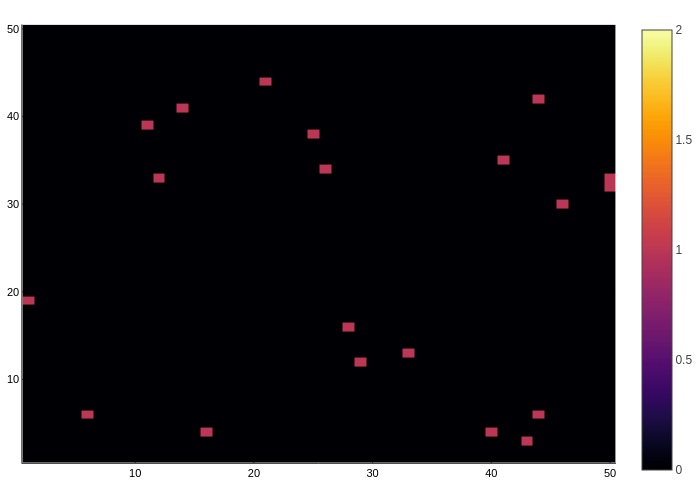

In [97]:
N = 50
infect_prob = 0.025
recovery_prob = 0.007
days = 200
num_infected = 20
map_hist = get_maphist(N, infect_prob, recovery_prob, days, num_infected)
animation = get_animation(map_hist, days, N)
gif(animation, "SIR_GIF1.gif", fps = 10)

In [98]:
draw_plots(map_hist, days, N)

<!DOCTYPE html>
 
 
 Plots.jl

### Symulacja 2
##### N = 50
##### infect_prob = 0.05
##### recovery_prob = 0.02
##### days = 200
##### num_infected = 50

┌ Info: Saved animation to 
│   fn = /home/jovyan/work/SIR_GIF1.gif
└ @ Plots /opt/julia/packages/Plots/SjqWU/src/animation.jl:104


Plots.AnimatedGif("/home/jovyan/work/SIR_GIF1.gif")
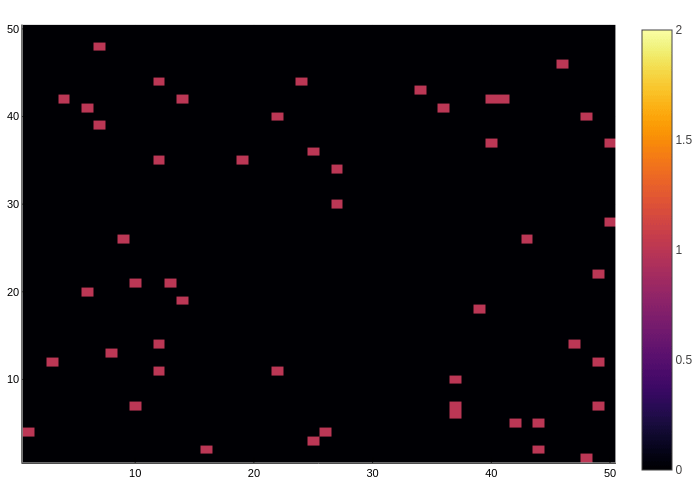

In [99]:
N = 50
infect_prob = 0.05
recovery_prob = 0.02
days = 200
num_infected = 50
map_hist = get_maphist(N, infect_prob, recovery_prob, days, num_infected)
animation = get_animation(map_hist, days, N)
gif(animation, "SIR_GIF1.gif", fps = 10)

In [100]:
draw_plots(map_hist, days, N)

<!DOCTYPE html>
 
 
 Plots.jl

### Symulacja 3
##### N = 50
##### infect_prob = 0.15
##### recovery_prob = 0.02
##### days = 200
##### num_infected = 10

┌ Info: Saved animation to 
│   fn = /home/jovyan/work/SIR_GIF1.gif
└ @ Plots /opt/julia/packages/Plots/SjqWU/src/animation.jl:104


Plots.AnimatedGif("/home/jovyan/work/SIR_GIF1.gif")
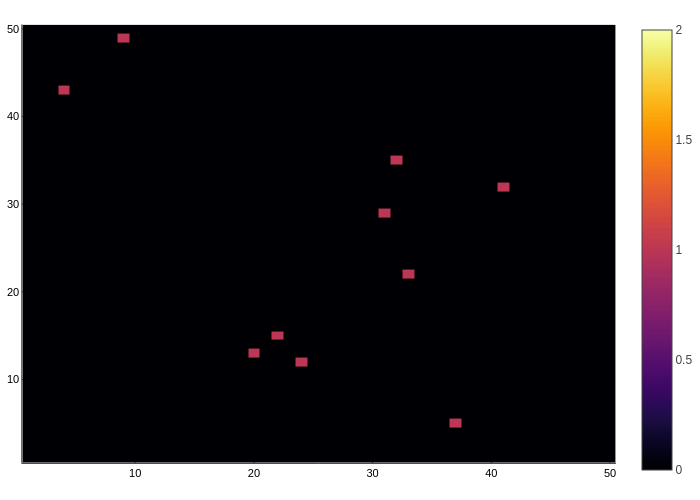

In [101]:
N = 50
infect_prob = 0.15
recovery_prob = 0.02
days = 200
num_infected = 10
map_hist = get_maphist(N, infect_prob, recovery_prob, days, num_infected)
animation = get_animation(map_hist, days, N)
gif(animation, "SIR_GIF1.gif", fps = 10)

In [102]:
draw_plots(map_hist, days, N)

<!DOCTYPE html>
 
 
 Plots.jl